# Practical Statistics for Data Scientists
## Exploratory Data Analysis

This Notebook is the python equivalent of the R code for Chapter-1, from the book <a href="http://shop.oreilly.com/product/0636920048992.do">Practical Statistics for Data Scientists</a> by Peter Bruce and Andrew Bruce. This <a href="https://github.com/andrewgbruce/statistics-for-data-scientists">GitHub</a> repository has the complete R code for the book.

The authors note that the aim of the book is to be a "Desk Reference" for key Statistical concepts that are relevant to Data Science, explaining their importance and the reason behind that choice.

Data that is used in the book, has been curated by the authors and made available on <a href="https://drive.google.com/drive/folders/0B98qpkK5EJemYnJ1ajA1ZVJwMzg">Google Drive</a> and <a href="https://www.dropbox.com/sh/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra?dl=0">Dropbox</a>


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import trim_mean

In [59]:
# Read the data from a .csv file
stateDataDF = pd.read_csv("../data/state.csv")

In [60]:
# Check the type of data structure, holding the data
type(stateDataDF)

pandas.core.frame.DataFrame

In [61]:
# Top 10 rows/records of the data
stateDataDF.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [62]:
# Bottom 10 rows/records of the data
stateDataDF.tail(10)

,State,Population,Murder.Rate,Abbreviation
40,South Dakota,814180,2.3,SD
41,Tennessee,6346105,5.7,TN
42,Texas,25145561,4.4,TX
43,Utah,2763885,2.3,UT
44,Vermont,625741,1.6,VT
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [63]:
# Adding a new column with derived data 
stateDataDF['PopulationInMillions'] = stateDataDF['Population']/1000000

In [64]:
# Get the data types of feature/attributes in the data
stateDataDF.dtypes

State                    object
Population                int64
Murder.Rate             float64
Abbreviation             object
PopulationInMillions    float64
dtype: object

In [65]:
# Checking the data, ensure column is added
stateDataDF.head(10)

,State,Population,Murder.Rate,Abbreviation,PopulationInMillions
0,Alabama,4779736,5.7,AL,4.779736
1,Alaska,710231,5.6,AK,0.710231
2,Arizona,6392017,4.7,AZ,6.392017
3,Arkansas,2915918,5.6,AR,2.915918
4,California,37253956,4.4,CA,37.253956
5,Colorado,5029196,2.8,CO,5.029196
6,Connecticut,3574097,2.4,CT,3.574097
7,Delaware,897934,5.8,DE,0.897934
8,Florida,18801310,5.8,FL,18.801310
9,Georgia,9687653,5.7,GA,9.687653


In [66]:
# Get the summary of numerical data type
# columns in the data
stateDataDF.describe()

,Population,Murder.Rate,PopulationInMillions
count,5.000000e+01,50.000000,50.000000
mean,6.162876e+06,4.066000,6.162876
std,6.848235e+06,1.915736,6.848235
min,5.636260e+05,0.900000,0.563626
25%,1.833004e+06,2.425000,1.833004
50%,4.436370e+06,4.000000,4.436369
75%,6.680312e+06,5.550000,6.680312
max,3.725396e+07,10.300000,37.253956


In [67]:
# Rename column heading
stateDataDF.rename(columns={'Murder.Rate': 'MurderRate'}, inplace=True)

In [68]:
# Get the column headings
list(stateDataDF)

['State', 'Population', 'MurderRate', 'Abbreviation', 'PopulationInMillions']

### Mean, Trimmed Mean, Weighted Mean, Median and Trimmed Median

In [69]:
populationMean = stateDataDF.Population.mean()

In [70]:
print(populationMean)

6162876.3


In [71]:
# Mean after discarding top and bottom 10% of Population numbers
# eliminating outliers
populationTrimmedMean = trim_mean(stateDataDF.Population, 0.1)

In [72]:
print(populationTrimmedMean)

4783697.125


In [73]:
# Weighted mean, in this case, the Murder Rate of a state is weighed based
# on the population of that state and then the mean is taken.
# Compared to the regular mean, where all the values are treated equally
murderRateWeightedMean = np.average(stateDataDF.MurderRate, weights=stateDataDF.Population)

In [74]:
print(murderRateWeightedMean)

4.44583398112


In [75]:
populationMedian = stateDataDF.Population.median()

In [76]:
print(populationMedian)

4436369.5


In [77]:
# Sort the data frame by the Murder Rate values
stateDataDF.sort_values('MurderRate', inplace=True)

# Calculate the Cummulative Sum of the Population
cummulativeSum = stateDataDF.Population.cumsum()

# Find the midpoint of the Sum of Population
midPointCutOff = stateDataDF.Population.sum()/2.0

# The weighted Median is the 0th location index just after
# the Cummulative Sum is greater than or equal to the
# midpoint cut off
murderRateWeightedMedian = stateDataDF.MurderRate[cummulativeSum >= midPointCutOff].iloc[0]

In [78]:
print(murderRateWeightedMedian)

4.4


In [79]:
# Plot Population In Millions
fig, ax1 = plt.subplots()
fig.set_size_inches(15,  9)


ax1 = sns.barplot(x="State", y="PopulationInMillions", data=stateDataDF.sort_values('MurderRate'), palette="Set2")
ax1.set(xlabel='States', ylabel='Population In Millions')
ax1.set_title('Population in Millions by State', size=20)

plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

In [80]:
# Plot Population In Millions
fig, ax2 = plt.subplots()
fig.set_size_inches(15,  9)


ax2 = sns.barplot(x="State", y="MurderRate", data=stateDataDF.sort_values('MurderRate', ascending=1), palette="husl")
ax2.set(xlabel='States', ylabel='Murder Rate per 100000')
ax2.set_title('Murder Rate by State', size=20)

plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

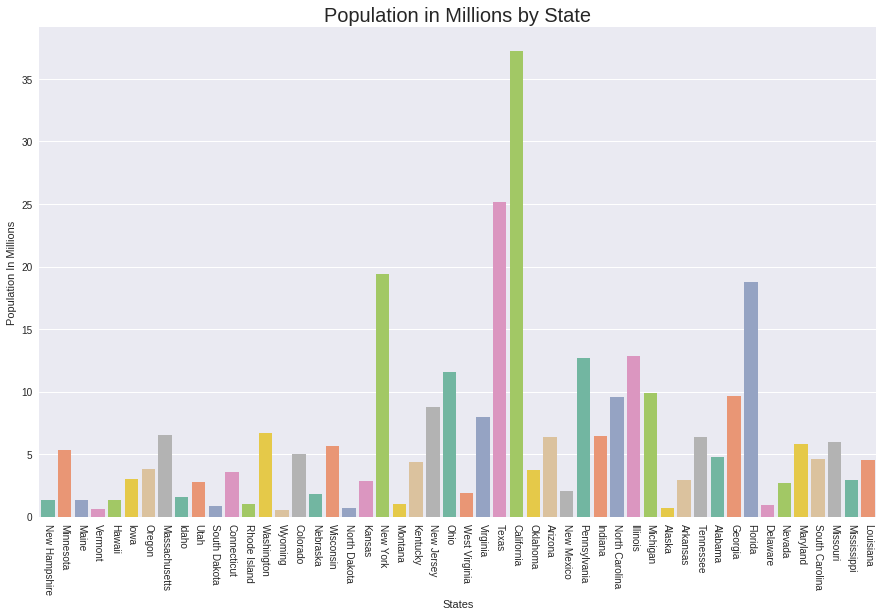

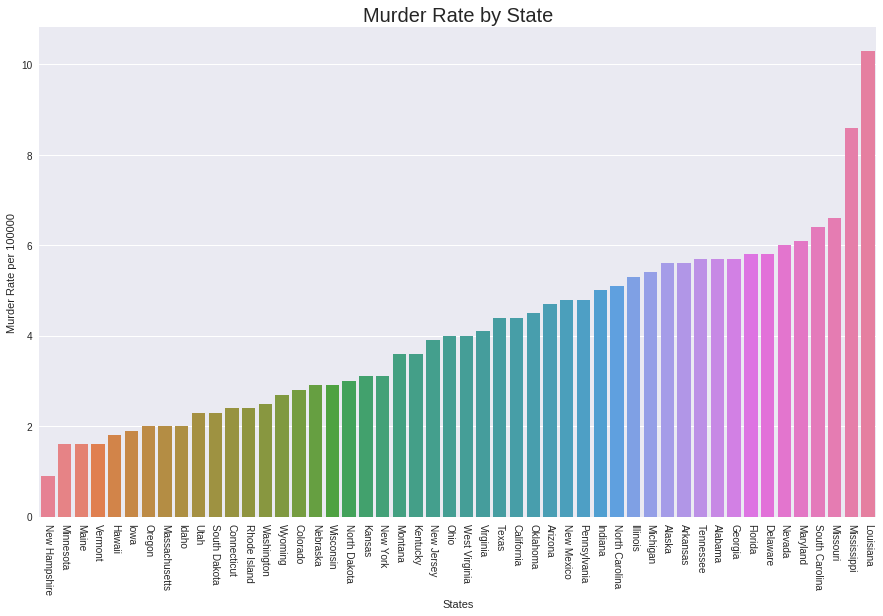

In [81]:
sns.plt.show()

Although Louisiana is ranked 17 by population (about 4.53M), it has the highest Murder rate of 10.3 per 1M people.